# Time channel IP calculator
#### original code by BIT
#### Last change  BIT 2021.11.02

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Set timegate

In [2]:
No_time = 20      # No. IP timegate
time_s = 0.155   # start time
time_f = 4       # Finish time

measured_time = np.linspace(time_s,time_f,No_time + 1)    # linear spacing
# measured_time = np.logspace(np.log10(time_s),np.log10(time_f),No_time + 1)   # log spacing
# measured_time = np.array([0.01, 0.063, 0.322, 2.0])    # manual spacing

print (measured_time)

[0.155   0.34725 0.5395  0.73175 0.924   1.11625 1.3085  1.50075 1.693
 1.88525 2.0775  2.26975 2.462   2.65425 2.8465  3.03875 3.231   3.42325
 3.6155  3.80775 4.     ]


### Cole-Cole model parameters

In [3]:
charg = 0.1  ### make sure mV/V or V/V
time_const = 1
freq_exp = 0.6

### Calculate timedomain CC model

In [4]:
from scipy.special import gamma
gamma_fn = gamma(No_time+1)

log_sum_cc = np.zeros(No_time+1, dtype=float)
measured_charg = np.zeros(No_time+1, dtype=float)
time_charg = np.zeros(No_time, dtype=float)
dt = np.zeros(No_time); time_gate = np.zeros(No_time);

for itch in range(0, No_time+1):  
    t_tau = 0; sum_cc = 0; 
    for init in range(0, 300):
        t_tau = np.power((measured_time[itch]/time_const), init*freq_exp)
        sum_cc += ((np.power(-1,init) * t_tau)/(gamma(1+init*freq_exp)))
    
    log_sum_cc[itch] = sum_cc

# log_sum_cc = np.where(log_sum_cc<0, 0, log_sum_cc)     # to provide Nan       
measured_charg = charg * log_sum_cc

for itch in range(0, No_time): 
    time_charg[itch] = (measured_charg[itch] + measured_charg[itch+1])*0.5
    dt[itch] = measured_time[itch+1] - measured_time[itch]  
    time_gate[itch] = measured_time[itch] + dt[itch]*0.5

    

In [6]:
time_gate

array([0.251125, 0.443375, 0.635625, 0.827875, 1.020125, 1.212375,
       1.404625, 1.596875, 1.789125, 1.981375, 2.173625, 2.365875,
       2.558125, 2.750375, 2.942625, 3.134875, 3.327125, 3.519375,
       3.711625, 3.903875])

In [7]:
log_sum_cc

array([0.71369305, 0.5937665 , 0.51992743, 0.46724632, 0.42689361,
       0.39460836, 0.36799085, 0.34555379, 0.32631247, 0.30958244,
       0.29486974, 0.28180706, 0.27011446, 0.25957419, 0.25001389,
       0.24129507, 0.23330497, 0.22595076, 0.21915518, 0.21285338,
       0.20699044])

In [8]:
time_charg*1000

array([65.37297721, 55.68469634, 49.3586877 , 44.70699647, 41.07509837,
       38.1299608 , 35.67723231, 33.59331313, 31.7947456 , 30.22260921,
       28.83384016, 27.59607593, 26.48443234, 25.47940382, 24.56544766,
       23.73000189, 22.96278673, 22.25529732, 21.60042823, 20.99219107])

### Output

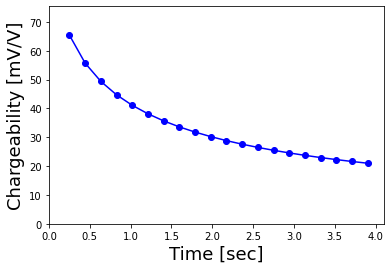

In [9]:
plt.plot(time_gate,time_charg*1000,'-bo')
plt.xlabel('Time [sec]',fontsize = 18)
plt.ylabel('Chargeability [mV/V]',fontsize = 18)
plt.xlim([0, time_f+0.1])
plt.ylim([0, np.max(time_charg)*1000+10])
# plt.savefig(output_path+"/background%d.png" %itch, dpi=1000)    
plt.show()  

In [10]:
int_charg = (time_f - time_s)**-1 * sum(time_charg * No_time+1)
int_charg

8.687210518999887

In [12]:
# Output 
ouput_stack = np.column_stack([np.arange(No_time),time_gate,time_charg])
np.savetxt("timechIP.txt", ouput_stack, fmt="%10.4f", delimiter=',')